In [1]:
##################################################################
##     .___.__     __ __              __             /\         ##
##   __| _/|__|   |__|  | __  _______/  |____________)/   ______##
##  / __ | |  |   |  |  |/ / /  ___/\   __\_  __ \__  \  /  ___/##
## / /_/ | |  |   |  |    <  \___ \  |  |  |  | \// __ \_\___ \ ##
## \____ | |__/\__|  |__|_ \/____  > |__|  |__|  (____  /____  >##
##      \/    \______|    \/     \/                   \/     \/ ##
##################################################################
######################################## shortest path algorithm # 
# JR 20210331 ####################################################
##################################################################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Graph controls
n_nodes = 10
net_size = 15
density = 0.8 # Controls number of connections b/w nodes. Number b/w 0 & <1. Lower number = more connections

In [4]:
# Create node table
node_list = list(range(1,n_nodes+1))
nodes = pd.DataFrame(node_list, columns=['node'])
nodes['x'] = np.random.randint(1, net_size, size=n_nodes)
nodes['y'] = np.random.randint(1, net_size, size=n_nodes)

In [5]:
# Create adjacency matrix (i.e. links between the nodes)
adj_mat = np.random.rand(n_nodes, n_nodes)
adj_mat[adj_mat > density] = 1
adj_mat[adj_mat < 1] = 0

In [6]:
# (Optional) Mirror so links are two way
for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if adj_mat[i, j] == 1:
            adj_mat[j, i] = 1

In [7]:
def getDistance(x1, y1, x2, y2):
    '''
    Function for straight line (Pythagoras) distance bw nodes 
    '''
    dist = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return dist

In [8]:
def distanceForDict(current, target):
    '''
    Apply distance function within dictionary comprehension
    '''
    dist = getDistance(nodes.loc[nodes['node']==current]['x'].values[0],
                nodes.loc[nodes['node']==current]['y'].values[0],
                nodes.loc[nodes['node']==target]['x'].values[0],
                nodes.loc[nodes['node']==target]['y'].values[0])
    dist = max(dist, 0.001) # if any nodes are overlaying, offset by tiny amount
    return dist

In [9]:
# For adjacent nodes calculate distances and store in a dictionary
distances = dict(zip(nodes.node, adj_mat.astype(int)*list(nodes.node)))
for node in distances:
    distances[node] = { i : distanceForDict(node, i) for i in list(distances[node][distances[node]!=0]) }

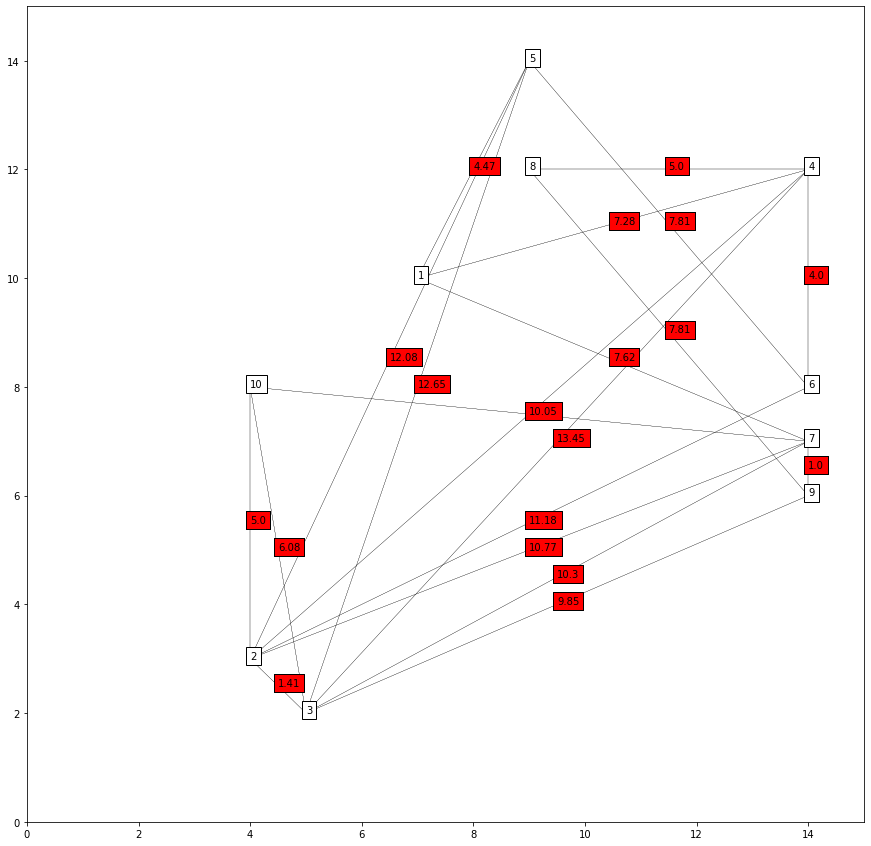

In [11]:
# Plot graph
plt.figure(figsize=(15, 15))
net = plt.plot(nodes['x'], nodes['y'], 'o', color='black')
plt.xlim(0, net_size)
plt.ylim(0, net_size)

# Add lines and labels
for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if ((i == j) | (adj_mat[i, j] < 1)):
            next
        else:
            dist_label_x_pos = (max(nodes.x[i], nodes.x[j]) + min(nodes.x[i], nodes.x[j]))/2
            dist_label_y_pos = (max(nodes.y[i],nodes.y[j]) + min(nodes.y[i],nodes.y[j]))/2
            label_text = np.round(getDistance(nodes.x[i], nodes.y[i], nodes.x[j], nodes.y[j]), 2)
            plt.plot([nodes.x[i], nodes.x[j]], [nodes.y[i], nodes.y[j]], color='k', linestyle='-', linewidth=0.2)
            plt.text(dist_label_x_pos, dist_label_y_pos, label_text, bbox=dict(facecolor='red'))
    plt.text(nodes.x[i], nodes.y[i], nodes.node[i], bbox=dict(facecolor='white'))

In [12]:
def dijkstra(start):
    '''
    Calculate shortest paths returning dictionaries of distances and paths
    '''
    unvisited = {node: None for node in nodes.node}
    visited = {}
    current = start
    path = {node: start for node in nodes.node}
    currentDistance = 0 
    unvisited[current] = currentDistance # Set current node's distance to zero
    
    while True:
        if isinstance(path[current], list):
            current_path = path[current]
        else:
            current_path = [path[current]]
        
        # Iterate through unvisited nodes
        for neighbour, distance in distances[current].items():
            if neighbour not in unvisited: continue # if already visited, skip
            newDistance = currentDistance + distance
            inner_path = current_path.copy()
            # Check if new distance is shorter, if yes update
            if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
                unvisited[neighbour] = newDistance
                inner_path.append(neighbour)
                path[neighbour] = inner_path
        
        visited[current] = currentDistance
        del unvisited[current]
        if not unvisited: break # if visited all nodes already, finish.
        candidates = [node for node in unvisited.items() if node[1]] # NB distance can't equal zero
        current, currentDistance = sorted(candidates, key = lambda x: x[1])[0] # Go to next closest node
    return visited, path

In [13]:
# Create storage for network distances and paths
dists = {}
paths = {}

# Iterate through all nodes and store results
for node in nodes.node:
    dists[node], paths[node] = dijkstra(node)

In [14]:
# Distance matrix
pd.DataFrame(dists).sort_index()

1          2          3          4          5          6   \
1    0.000000  16.555182  17.121247   7.280110   4.472136  11.280110   
2   16.555182   0.000000   1.414214  13.453624  12.083046  11.180340   
3   17.121247   1.414214   0.000000  13.453624  12.649111  12.594553   
4    7.280110  13.453624  13.453624   0.000000  11.752246   4.000000   
5    4.472136  12.083046  12.649111  11.752246   0.000000   7.810250   
6   11.280110  11.180340  12.594553   4.000000   7.810250   0.000000   
7    7.615773  10.770330  10.295630  13.810250  12.087909  17.810250   
8   12.280110  18.453624  17.659107   5.000000  16.752246   9.000000   
9    8.615773  11.263071   9.848858  12.810250  13.087909  16.810250   
10  17.665649   5.000000   6.082763  18.453624  17.083046  16.180340   

           7          8          9          10  
1    7.615773  12.280110   8.615773  17.665649  
2   10.770330  18.453624  11.263071   5.000000  
3   10.295630  17.659107   9.848858   6.082763  
4   13.810250   5.000000  12.810250  18.453624  
5   12.087909  16.752246  13.087909  17.083046  
6   17.810250   9.000000  16.810250  16.180340  
7    0.000000   8.810250   1.000000  10.049876  
8    8.810250   0.000000   7.810250  18.860125  
9    1.000000   7.810250   0.000000  11.049876  
10  10.049876  18.860125  11.049876   0.000000

In [15]:
# Path list
paths

{1: {1: 1,
  2: [1, 5, 2],
  3: [1, 5, 3],
  4: [1, 4],
  5: [1, 5],
  6: [1, 4, 6],
  7: [1, 7],
  8: [1, 4, 8],
  9: [1, 7, 9],
  10: [1, 7, 10]},
 2: {1: [2, 5, 1],
  2: 2,
  3: [2, 3],
  4: [2, 4],
  5: [2, 5],
  6: [2, 6],
  7: [2, 7],
  8: [2, 4, 8],
  9: [2, 3, 9],
  10: [2, 10]},
 3: {1: [3, 5, 1],
  2: [3, 2],
  3: 3,
  4: [3, 4],
  5: [3, 5],
  6: [3, 2, 6],
  7: [3, 7],
  8: [3, 9, 8],
  9: [3, 9],
  10: [3, 10]},
 4: {1: [4, 1],
  2: [4, 2],
  3: [4, 3],
  4: 4,
  5: [4, 1, 5],
  6: [4, 6],
  7: [4, 8, 9, 7],
  8: [4, 8],
  9: [4, 8, 9],
  10: [4, 2, 10]},
 5: {1: [5, 1],
  2: [5, 2],
  3: [5, 3],
  4: [5, 1, 4],
  5: 5,
  6: [5, 6],
  7: [5, 1, 7],
  8: [5, 1, 4, 8],
  9: [5, 1, 7, 9],
  10: [5, 2, 10]},
 6: {1: [6, 4, 1],
  2: [6, 2],
  3: [6, 2, 3],
  4: [6, 4],
  5: [6, 5],
  6: 6,
  7: [6, 4, 8, 9, 7],
  8: [6, 4, 8],
  9: [6, 4, 8, 9],
  10: [6, 2, 10]},
 7: {1: [7, 1],
  2: [7, 2],
  3: [7, 3],
  4: [7, 9, 8, 4],
  5: [7, 1, 5],
  6: [7, 9, 8, 4, 6],
  7: 7,
  8: [7,